# Extract Face Landmarks

A function extract facial landmarks.

> from mlxtend.image import extract_face_landmarks

## Overview

The `extract_face_landmarks` function detects the faces in a given image, and then it will return the face landmark points (also known as face shape) for the first found face in the image based on dlib's face landmark detection code (http://dlib.net/face_landmark_detection_ex.cpp.html):

> The face detector we use is made using the classic Histogram of Oriented
    Gradients (HOG) feature combined with a linear classifier, an image pyramid,
    and sliding window detection scheme.  The pose estimator was created by
    using dlib's implementation of the paper:
       One Millisecond Face Alignment with an Ensemble of Regression Trees by
       Vahid Kazemi and Josephine Sullivan, CVPR 2014
    and was trained on the iBUG 300-W face landmark dataset (see
    https://ibug.doc.ic.ac.uk/resources/facial-point-annotations/):  
       C. Sagonas, E. Antonakos, G, Tzimiropoulos, S. Zafeiriou, M. Pantic. 
       300 faces In-the-wild challenge: Database and results. 
       Image and Vision Computing (IMAVIS), Special Issue on Facial Landmark Localisation "In-The-Wild". 2016.
    You can get the trained model file from:
    http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2.
    Note that the license for the iBUG 300-W dataset excludes commercial use.
    So you should contact Imperial College London to find out if it's OK for
    you to use this model file in a commercial product.

### References

- Kazemi, Vahid, and Josephine Sullivan. "One millisecond face alignment with an ensemble of regression trees." Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition. 2014.

## Example 1 

In [1]:
import imageio
import matplotlib.pyplot as plt


from mlxtend.image import extract_face_landmarks

img = imageio.imread('lena.png')
landmarks = extract_face_landmarks(img)
print(landmarks.shape)
print('\n\nFirst 10 landmarks:\n', landmarks[:10])

(68, 2)


First 10 landmarks:
 [[206 266]
 [204 290]
 [205 314]
 [209 337]
 [220 357]
 [236 374]
 [253 387]
 [273 397]
 [290 398]
 [304 391]]


Visualization of the landmarks:

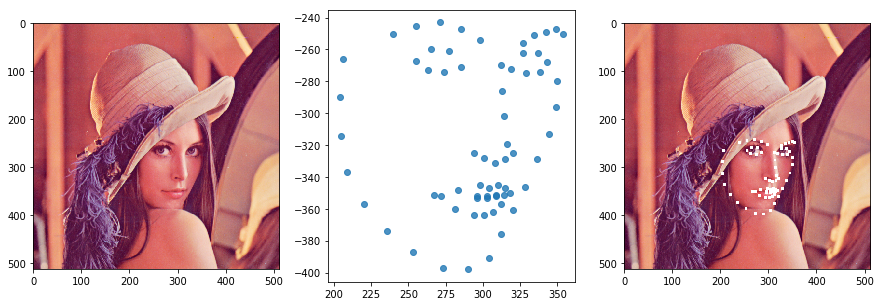

In [2]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 3, 1)
ax.imshow(img)
ax = fig.add_subplot(1, 3, 2)
ax.scatter(landmarks[:, 0], -landmarks[:, 1], alpha=0.8)
ax = fig.add_subplot(1, 3, 3)
img2 = img.copy()
for p in landmarks:
    img2[p[1]-3:p[1]+3,p[0]-3:p[0]+3,:] = (255, 255, 255)
ax.imshow(img2)
plt.show()

## Display the index of landmark popints

In [3]:
# left and right eyes indexes
import numpy as np

left = np.array([36,37,38,39,40,41])
right = np.array([42,43,44,45,46,47])

landmarks = np.array([[ 75, 197], [ 76, 222], [ 79, 248], [ 83, 274],
               [ 92, 298], [106, 318], [126, 335], [149, 347],
               [175, 350], [202, 347], [224, 334], [242, 316],
               [255, 295], [263, 271], [267, 246], [270, 221],
               [270, 196], [ 93, 176], [105, 162], [123, 157],
               [142, 159], [160, 166], [190, 167], [207, 160],
               [227, 158], [245, 163], [256, 177], [175, 187],
               [176, 202], [176, 217], [176, 233], [154, 248],
               [164, 251], [176, 253], [187, 251], [197, 248],
               [113, 194], [124, 187], [137, 187], [148, 195], 
               [136, 198], [123, 198], [201, 196], [213, 188],
               [226, 188], [237, 194], [227, 199], [214, 198],
               [137, 288], [151, 278], [165, 272], [176, 275],
               [186, 272], [200, 278], [213, 288], [200, 298],
               [187, 302], [175, 303], [164, 302], [150, 298],
               [143, 288], [165, 284], [176, 285], [186, 284],
               [207, 288], [186, 286], [175, 288], [165, 286]])

Coordinates of the Left Eye:  [130.16666667 193.16666667]
Coordinates of the Right Eye:  [219.66666667 193.83333333]


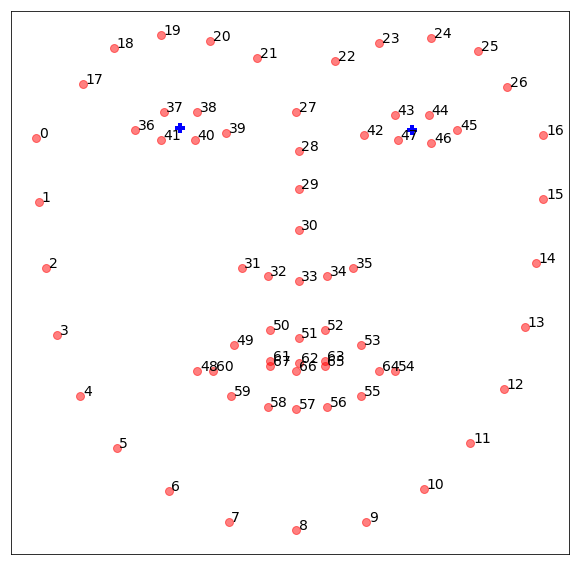

In [4]:

fig = plt.figure(figsize=(10,10))
plt.plot(landmarks[:,0], -landmarks[:,1], 'ro', markersize=8, alpha = 0.5)
for i in range(landmarks.shape[0]):
    plt.text(landmarks[i,0]+1, -landmarks[i,1], str(i), size=14)


left_eye = np.mean(landmarks[left], axis=0)
right_eye = np.mean(landmarks[right], axis=0)
print('Coordinates of the Left Eye: ', left_eye)
print('Coordinates of the Right Eye: ', right_eye)
plt.plot([left_eye[0]], [-left_eye[1]], 
            marker='+', color='blue', markersize=10, mew=4)

plt.plot([right_eye[0]], [-right_eye[1]], 
            marker='+', color='blue', markersize=10, mew=4)

plt.xticks([])
plt.yticks([])

plt.show()

## API

In [3]:
with open('../../api_modules/mlxtend.image/extract_face_landmarks.md', 'r') as f:
    print(f.read())

## extract_face_landmarks

*extract_face_landmarks(img, return_dtype=<class 'numpy.int32'>)*

Function to extract face landmarks.

Note that this function requires an installation of
the Python version of the library "dlib": http://dlib.net

**Parameters**

- `img` : array, shape = [h, w, ?]

    numpy array of a face image.
    Supported shapes are
    - 3D tensors with 1
    or more color channels, for example,
    RGB: [h, w, 3]
    - 2D tensors without color channel, for example,
    Grayscale: [h, w]
    return_dtype: the return data-type of the array,
    default: np.int32.

**Returns**

- `landmarks` : numpy.ndarray, shape = [68, 2]

    A numpy array, where each row contains a landmark/point x-y coordinates.

**Examples**

For usage examples, please see
    [http://rasbt.github.io/mlxtend/user_guide/sources/image/extract_face_landmarks.ipynb](http://rasbt.github.io/mlxtend/user_guide/sources/image/extract_face_landmarks.ipynb)


